# Unsupervised-Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [35]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv('data/seeds_dataset.txt', names=cols, sep='\\s+')

In [ ]:
print(df.head())

In [ ]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        y_label = cols[i]
        x_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

# Clustering

In [38]:
from sklearn.cluster import KMeans

In [66]:
x = 'compactness'
y = 'asymmetry'
X = df[[x,y]].values

In [67]:
kmeans = KMeans(n_clusters= 3).fit(X)
clusters = kmeans.labels_

In [68]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns= [x, y, 'class'])

In [ ]:
#K Means Classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

In [ ]:
#Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# Higher Dimensions

In [62]:
X = df[cols[:-1]].values

In [63]:
kmeans = KMeans(n_clusters= 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns= df.columns)

In [ ]:
#K Means Classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

In [ ]:
#Original Classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [73]:
X.shape

(210, 2)

In [74]:
transformed_x.shape

(210, 2)

In [75]:
transformed_x[:5]

array([[-1.47918088, -0.00770575],
       [-2.68221718, -0.00387395],
       [-1.00136452,  0.02878435],
       [-1.44130905,  0.01699192],
       [-2.34533794,  0.02018164]])

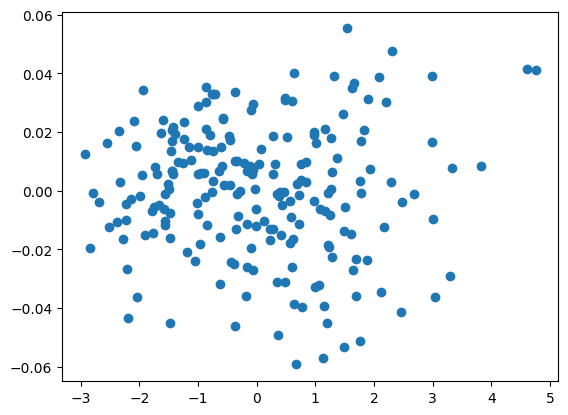

In [77]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [78]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns= ['pca1','pca2', 'class'])

In [79]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns= ['pca1','pca2', 'class'])

[]

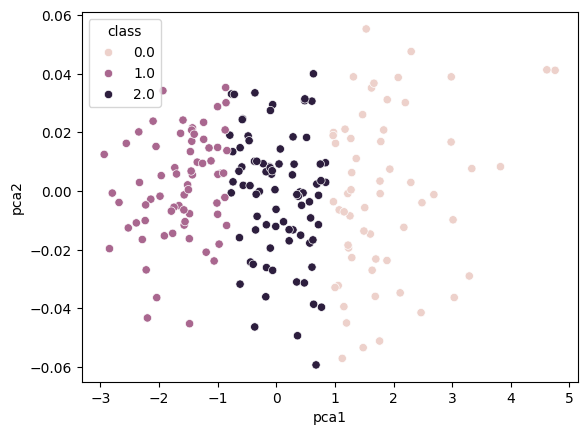

In [82]:
#K Means Classes
sns.scatterplot(x='pca1', y='pca2', hue='class', data=kmeans_pca_df)
plt.plot()

[]

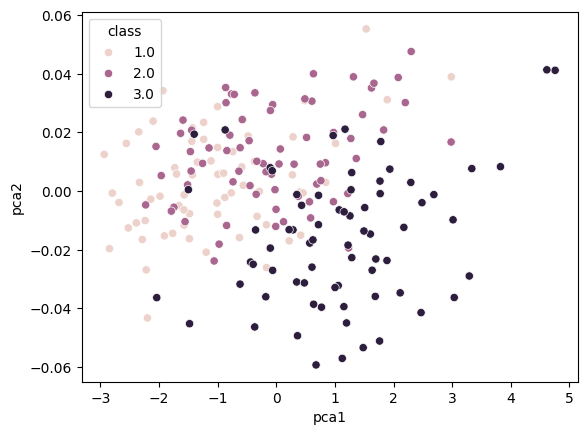

In [83]:
#truth Classes
sns.scatterplot(x='pca1', y='pca2', hue='class', data=truth_pca_df)
plt.plot()